In [1]:
import sys
sys.path.append('../')

In [2]:
from scripts.utils import data_path
import pandas as pd
from tqdm import tqdm
pd.set_option('display.max_columns', 500)
import seaborn as sns
import numpy as np
%matplotlib inline

# Catalogs loading and preprocessing

## Counterparts catalog

In [3]:
ctps = pd.read_pickle(data_path+'csc_desi_r50_gaia_ctps.gz_pkl', compression='gzip')
ctps['is_counterpart'] = True
x_ray_flux_lim = 3e-15

ctps = ctps[ctps['flux_csc_05_2']>x_ray_flux_lim]
ctps_secure = ctps[ctps['counterpart_quality_flag']==1]
ctps_secure.head(5)

,name_csc,ra_csc,dec_csc,sep_csc,release,brickid,objid,brick_primary,type,ra,dec,ra_ivar,dec_ivar,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,pmra,pmdec,parallax,pmra_ivar,pmdec_ivar,parallax_ivar,flux_csc_05_2,r_98_csc,mag_g,mag_r,mag_z,mag_w1,mag_w2,mag_w3,mag_w4,desi_id,r_false_003_dens_deg2_sep_10_50,sep_csc_less_r_98,sep_csc_less_r_false,total_sep_csc_less_r_98,counterpart_quality_flag,is_counterpart
122,2CXO J000001.7+003824,0.007351,0.640170,0.510857,9010,334688,289,True,b'PSF',0.007209,0.640172,7.968032e+10,7.686111e+10,0.446684,0.791833,0.833604,2.084917,-1.714462,-19.942390,-1472.021851,0.0,0.0,0.0,0.0,0.0,0.0,4.925396e-15,1.598058,23.374999,22.753416,22.697600,21.702278,NaN,NaN,NaN,9010_334688_289,0.783775,True,True,1,1,True
706,2CXO J000002.4+004444,0.010261,0.745756,0.168650,9010,334688,428,True,b'DEV',0.010231,0.745719,4.837769e+09,2.799387e+09,0.409332,0.494572,1.014339,4.271025,2.108738,-69.947258,-2105.617432,0.0,0.0,0.0,0.0,0.0,0.0,6.223680e-15,1.187993,23.469812,23.264425,22.484542,20.923670,21.689943,NaN,NaN,9010_334688_428,0.747015,True,True,1,1,True
1151,2CXO J000004.2+004038,0.017509,0.677271,0.340550,9010,334688,728,True,b'DEV',0.017430,0.677220,1.214703e+10,1.709058e+10,0.834075,1.629502,2.029589,12.394610,8.341883,151.319443,-9200.514648,0.0,0.0,0.0,0.0,0.0,0.0,3.489255e-15,1.210327,22.696987,21.969863,21.731480,19.766918,20.196840,17.050263,NaN,9010_334688_728,0.758688,True,True,1,1,True
1528,2CXO J000004.5-552604,0.018973,-55.434463,0.302039,9010,58166,392,True,b'PSF',0.018886,-55.434395,5.386807e+11,8.053757e+11,2.826036,3.806152,4.085902,24.098080,35.776527,-103.290527,7386.880371,0.0,0.0,0.0,0.0,0.0,0.0,1.030507e-14,2.599839,21.372056,21.048785,20.971780,19.045044,18.616005,NaN,12.828847,9010_58166_392,0.850754,True,True,1,1,True
1634,2CXO J000004.7+004654,0.019850,0.781780,0.341217,9010,334688,828,True,b'SER',0.019784,0.781712,4.079795e+13,4.402594e+13,257.798218,611.787598,1161.549072,1052.845337,677.435303,1074.324219,1625.962158,0.0,0.0,0.0,0.0,0.0,0.0,3.925906e-15,1.477375,16.471800,15.533499,14.837406,14.944088,15.422831,14.922162,14.472224,9010_334688_828,0.767811,True,True,1,1,True


## Field sources catalog

In [4]:
field_srcs = pd.read_pickle(data_path+'csc_desi_r50_gaia_field.gz_pkl', compression='gzip')
field_srcs['is_counterpart'] = False
field_srcs['flux_csc_05_2'] = np.nan
field_srcs.head(5)

,name_csc,ra_csc,dec_csc,sep_csc,release,brickid,objid,brick_primary,type,ra,dec,ra_ivar,dec_ivar,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,pmra,pmdec,parallax,pmra_ivar,pmdec_ivar,parallax_ivar,flux_csc_05_2,r_98_csc,mag_g,mag_r,mag_z,mag_w1,mag_w2,mag_w3,mag_w4,desi_id,r_false_003_dens_deg2_sep_10_50,sep_csc_less_r_98,sep_csc_less_r_false,total_sep_csc_less_r_98,counterpart_quality_flag,is_counterpart
4176692,2CXO J152142.0+075206,230.425240,7.868377,45.277180,9010,377251,5232,True,b'REX',230.419079,7.879374,4.896545e+10,4.918519e+10,0.318928,0.479022,6.062273,2.592642,7.370953,42.043903,-693.755066,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.908405,23.740770,23.299112,20.543411,21.465644,20.331191,18.440742,NaN,9010_377251_5232,1.142539,False,False,1,0,False
4695822,2CXO J210406.3-412424,316.026414,-41.406738,13.891881,9010,112477,8157,True,b'REX',316.024149,-41.410203,2.603485e+09,2.664049e+09,0.106113,0.167416,0.159652,1.673333,3.653313,30.792233,2145.953613,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.798694,24.935580,24.440507,24.492067,21.941044,21.093283,18.778897,14.170949,9010_112477_8157,0.891397,False,False,1,0,False
3469899,2CXO J131426.0+621738,198.608459,62.294119,27.633834,9011,623819,3586,True,b'PSF',198.622030,62.289748,1.408769e+09,1.444697e+09,0.131142,0.378554,0.573298,5.202581,4.263170,10.813979,539.721985,0.0,0.0,0.0,0.0,0.0,0.0,NaN,8.236360,24.705642,23.554680,23.104049,20.709453,20.925668,19.915036,15.669575,9011_623819_3586,1.351870,False,False,1,0,False
2851140,2CXO J114657.2+554127,176.738538,55.690890,20.175873,9011,604409,2261,True,b'REX',176.731236,55.694694,1.060411e+08,9.060222e+07,0.301347,4.720928,0.692839,21.239677,11.819044,-63.899155,157.419952,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.426068,23.802332,20.814932,22.898419,19.182130,19.818544,NaN,17.007350,9011_604409_2261,1.488360,False,False,1,0,False
3102272,2CXO J122641.8+215217,186.674245,21.871513,43.143479,9010,454877,4274,True,b'SER',186.669974,21.882823,1.097360e+12,1.045842e+12,6.299274,35.119892,85.034477,154.381348,97.670174,10.877891,-452.730011,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.181590,20.501774,18.636117,17.676013,17.028513,17.525595,19.908638,NaN,9010_454877_4274,0.896281,False,False,1,0,False


## Joined catalog + color features

In [5]:
photo_cat = pd.concat([ctps_secure, field_srcs])

features_cols = ['mag_g','mag_r','mag_z'] 
features_cols += ['mag_w1', 'mag_w2']

features_cols += ['col_gr', 'col_rz']
features_cols += ['col_zw1', 'col_rw2']

target_col = ['is_counterpart']


photo_cat['col_gr'] = photo_cat['mag_g'] - photo_cat['mag_r']
photo_cat['col_rz'] = photo_cat['mag_r'] - photo_cat['mag_z']
photo_cat['col_zw1'] = photo_cat['mag_z'] - photo_cat['mag_w1']
photo_cat['col_rw2'] = photo_cat['mag_r'] - photo_cat['mag_w2']

photo_cat = photo_cat[features_cols+target_col+['flux_csc_05_2']]

photo_cat = photo_cat.replace([np.inf, -np.inf], np.nan)
photo_cat= photo_cat.dropna(subset = features_cols, how = 'any')


print(photo_cat.is_counterpart.value_counts())
photo_cat = photo_cat.sample(frac=1)
photo_cat.reset_index(inplace=True, drop = True)


photo_cat.head(20)


False    170183
True      36929
Name: is_counterpart, dtype: int64


,mag_g,mag_r,mag_z,mag_w1,mag_w2,col_gr,col_rz,col_zw1,col_rw2,is_counterpart,flux_csc_05_2
0,24.201397,22.634297,21.078398,21.512082,23.549302,1.567100,1.555899,-0.433684,-0.915005,False,NaN
1,23.093654,22.328330,20.894134,18.841892,18.885243,0.765324,1.434196,2.052241,3.443087,False,NaN
2,24.434081,24.164313,24.174929,21.821804,20.956105,0.269769,-0.010616,2.353125,3.208208,False,NaN
3,21.377203,20.943486,20.604330,22.485447,20.788968,0.433717,0.339156,-1.881117,0.154518,False,NaN
4,26.159649,23.450975,21.888261,20.349036,20.569645,2.708674,1.562714,1.539224,2.881330,False,NaN
5,24.453463,23.615190,23.813187,23.785201,21.525093,0.838274,-0.197997,0.027986,2.090096,False,NaN
6,24.326005,22.937516,21.030488,21.222359,23.438346,1.388489,1.907029,-0.191871,-0.500830,False,NaN
7,20.787145,20.391849,19.939803,18.417746,18.380810,0.395296,0.452046,1.522056,2.011039,True,9.054868e-15
8,26.888326,25.446846,22.833138,19.500897,19.489168,1.441480,2.613708,3.332241,5.957678,False,NaN
9,22.029805,21.342639,20.853668,20.837377,19.395244,0.687166,0.488971,0.016291,1.947395,True,4.527934e-14


In [6]:
features_cols

['mag_g',
 'mag_r',
 'mag_z',
 'mag_w1',
 'mag_w2',
 'col_gr',
 'col_rz',
 'col_zw1',
 'col_rw2']

## Distribution of magnitides and colors in the field sources and counterparts

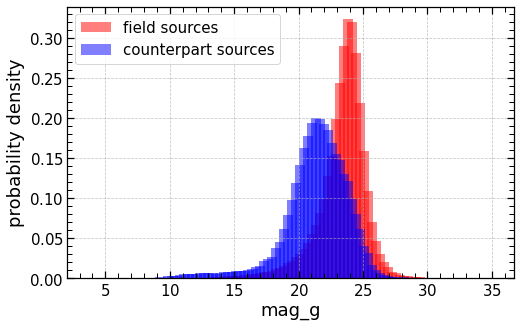

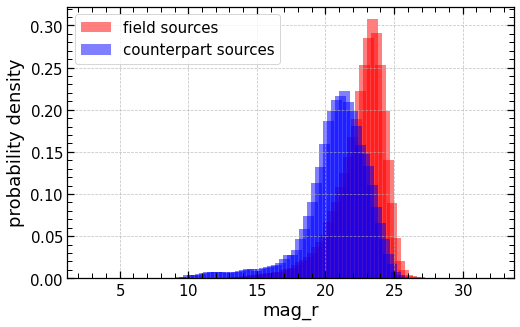

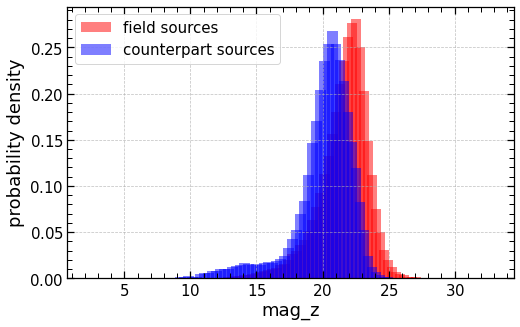

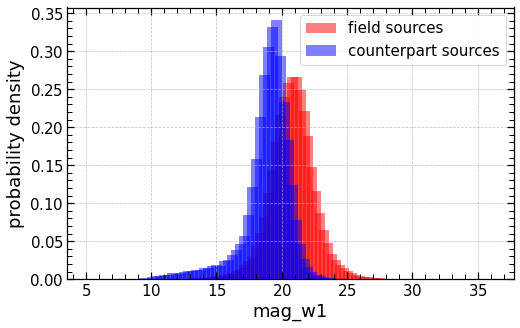

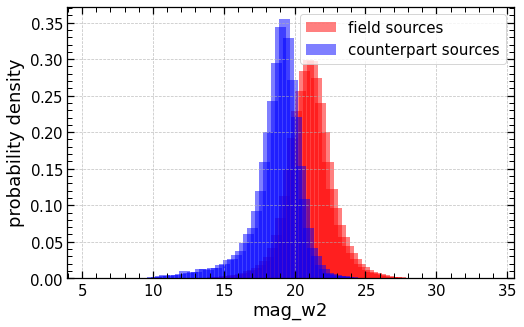

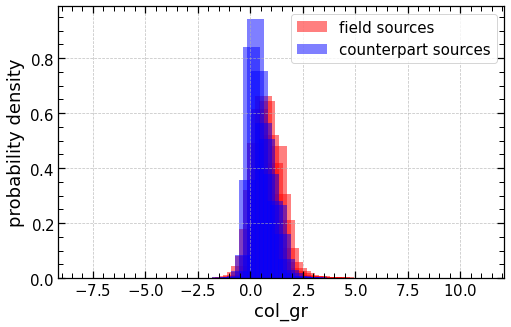

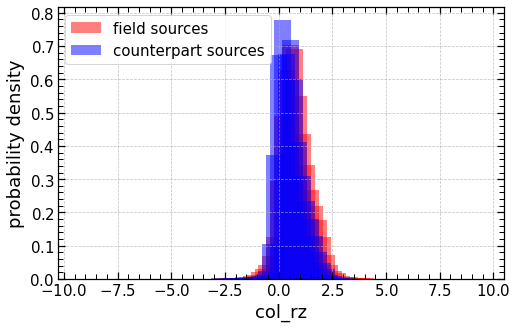

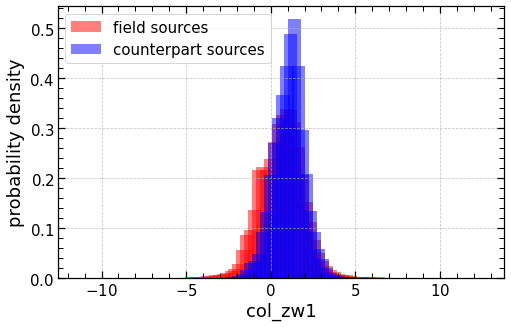

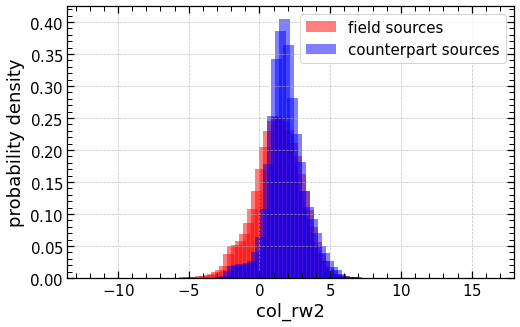

In [7]:
for col in features_cols:
    hist_field, bin_field = np.histogram(photo_cat[photo_cat.is_counterpart==0][col], bins=100, density=True)  
    
    hist_ctsp, bin_ctsp = np.histogram(photo_cat[photo_cat.is_counterpart==1][col], bins=bin_field, density=True)

    plt.figure(figsize=(8,5))
    plt.bar(bin_field[:-1], hist_field, color='r', label='field sources', alpha = 0.5)
    plt.bar(bin_ctsp[:-1], hist_ctsp, color='b', label='counterpart sources', alpha = 0.5)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('probability density')

    #save histograms in one file:
    #with columns lo, hi, selected, others
    hist_df = pd.DataFrame({'lo':bin_field[:-1], 'hi':bin_field[1:], 'selected':hist_ctsp, 'others':hist_field})

    hist_df.to_csv(f'model/{col}.csv', index=False, sep = '\t', header = ['#lo', 'hi', 'selected', 'others'])

In [25]:
photo_cat

,mag_g,mag_r,mag_z,mag_w1,mag_w2,col_gr,col_rz,col_zw1,col_rw2,is_counterpart,flux_csc_05_2,col_gw2
0,24.201397,22.634297,21.078398,21.512082,23.549302,1.567100,1.555899,-0.433684,-0.915005,False,NaN,0.652095
1,23.093654,22.328330,20.894134,18.841892,18.885243,0.765324,1.434196,2.052241,3.443087,False,NaN,4.208411
2,24.434081,24.164313,24.174929,21.821804,20.956105,0.269769,-0.010616,2.353125,3.208208,False,NaN,3.477977
3,21.377203,20.943486,20.604330,22.485447,20.788968,0.433717,0.339156,-1.881117,0.154518,False,NaN,0.588235
4,26.159649,23.450975,21.888261,20.349036,20.569645,2.708674,1.562714,1.539224,2.881330,False,NaN,5.590005
...,...,...,...,...,...,...,...,...,...,...,...,...
207107,22.280864,21.586288,20.955548,20.192122,20.861948,0.694576,0.630740,0.763426,0.724340,False,NaN,1.418916
207108,24.012238,23.198819,21.712208,20.030118,20.599717,0.813420,1.486610,1.682090,2.599101,False,NaN,3.412521
207109,24.379398,23.738685,23.441970,25.727482,20.891180,0.640713,0.296715,-2.285512,2.847505,False,NaN,3.488218
207110,25.798416,24.411446,23.357858,21.428274,21.778174,1.386970,1.053587,1.929584,2.633272,False,NaN,4.020242


<AxesSubplot:xlabel='col_gw2', ylabel='Probability'>

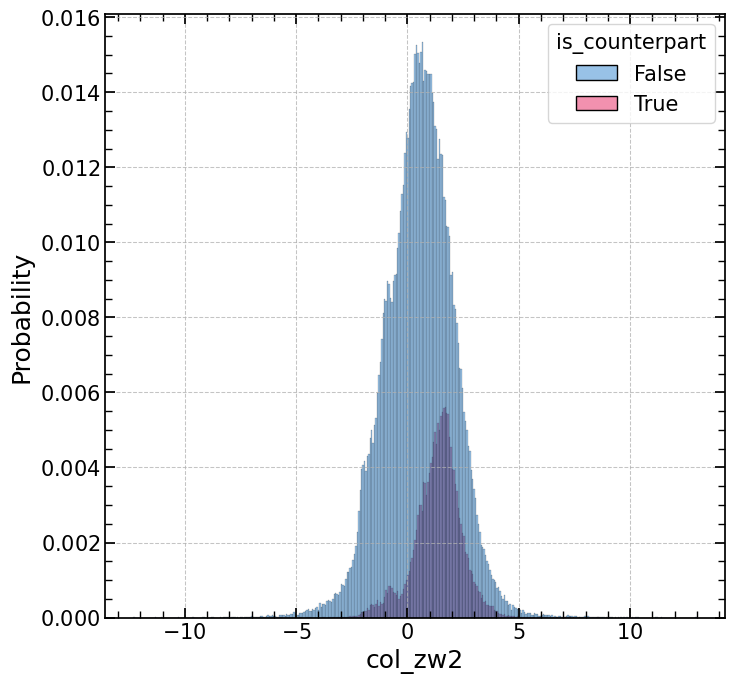

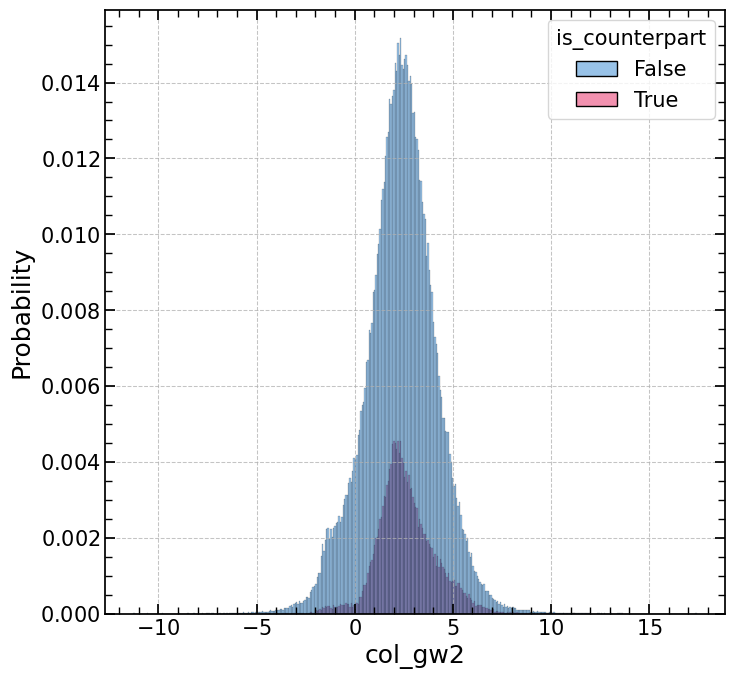

In [29]:
photo_cat['col_gw2'] =  photo_cat['mag_g'] - photo_cat['mag_w2']
photo_cat['col_zw2'] =  photo_cat['mag_z'] - photo_cat['mag_w2']
sns.histplot(data=photo_cat, x='col_zw2', hue='is_counterpart', stat= 'probability',  alpha = 0.5)
plt.figure()
sns.histplot(data=photo_cat, x='col_gw2', hue='is_counterpart', stat= 'probability',  alpha = 0.5)

# Design a scaler for the photometric features


In [8]:
from scripts.cross_match_scripts import my_scaler_forward

print(photo_cat.describe().loc[['min', 'max', 'mean']])

photo_cat_scaled = my_scaler_forward(photo_cat)
photo_cat_scaled.describe().loc[['min', 'max', 'mean']]

          mag_g      mag_r      mag_z     mag_w1     mag_w2     col_gr  \
min    4.006522   3.049027   2.599347   5.525982   5.778588  -7.818153   
max   35.015346  32.112752  32.825384  36.089616  33.893827  10.911796   
mean  23.173554  22.303807  21.470581  20.616904  20.776849   0.869747   

        col_rz    col_zw1    col_rw2  flux_csc_05_2  
min  -8.944800 -11.000029 -11.766899   3.000764e-15  
max   9.331316  12.431131  16.405652   9.704105e-12  
mean  0.833226   0.853677   1.526958   2.121626e-14  


,mag_g,mag_r,mag_z,mag_w1,mag_w2,col_gr,col_rz,col_zw1,col_rw2,flux_csc_05_2
min,0.114472,0.087115,0.074267,0.157885,0.165103,-0.781815,-0.894480,-1.100003,-1.176690,3.000764e-15
max,1.000438,0.917507,0.937868,1.031132,0.968395,1.091180,0.933132,1.243113,1.640565,9.704105e-12
mean,0.662102,0.637252,0.613445,0.589054,0.593624,0.086975,0.083323,0.085368,0.152696,2.121626e-14


# Classifier test/train function

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from copy import copy
from pickle import dump #saving data https://machinelearningmastery.com/how-to-save-and-load-models-and-data-preparation-in-scikit-learn-for-later-use/
from sklearn.ensemble import RandomForestClassifier


def assess_classifier(clf, X_test, y_test):   
    try:
        X_test = X_test.to_numpy()
        y_test = y_test.to_numpy()
    except:
        pass
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize = 'true')


    plt.figure(figsize=(8,4))
    predict_proba = clf.predict_proba(X_test)[:,1]
    ax = sns.displot(x = predict_proba, hue = y_test, bins = 50, stat='density')
    ax.set(title = 'test sample', ylabel  = 'probability density', xlabel = 'classifier predicted probability')
    plt.legend(title='Counterpart', labels=['X-ray counterpart', 'Field source'])



    proba_axis = np.linspace(0,0.99,20)
    completeness = np.ones_like(proba_axis) #fraction of sources classifued as counterparts out of all counterparts
    purity = np.ones_like(proba_axis) #fraction of sources with a correct identification as a X-ray counterpart

    for i,prob_val in tqdm(enumerate(proba_axis)):
        y_pred_tmp = clf.predict_proba(X_test)[:,1] > prob_val
        cm_tmp = confusion_matrix(y_test, y_pred_tmp)
        completeness[i] = cm_tmp[1,1]/(cm_tmp[1,1]+cm_tmp[1,0])
        if (cm_tmp[0,1]+cm_tmp[1,1]) == 0:
            purity[i] = 1
        else:
            purity[i] = cm_tmp[1,1]/(cm_tmp[0,1]+cm_tmp[1,1])

    #purity and completeness interseption 
    id_inters = np.argmin(np.abs(completeness-purity))
    proba_inters = proba_axis[id_inters]
    best_completeness = completeness[id_inters].round(2)
    best_purity = purity[id_inters].round(2)

    plt.figure(figsize=(8,4))
    plt.plot(proba_axis, completeness, 'r-', label = 'completeness = [true positives]/[true positives + false positives]')
    plt.plot(proba_axis, purity, 'b--', label = 'purity = [true positives]/[true positives + false negatives]')
    plt.plot(proba_inters, best_completeness, '*r', label = 'best completeness = '+str(best_completeness))
    #plt.plot(proba_inters, best_purity, '*b', label = 'best purity = '+str(best_purity))
    plt.axvline(x=proba_inters, color='k', linestyle='--')
    plt.xlabel('classifier predicted probability')
    plt.ylabel('completeness/purity')
    #plt.suptitle('test sample, '+str(clf))
    plt.legend()
    return cm, best_completeness, predict_proba
        

def train_RF_classifier(data_scaled, features_cols, target_col, x_ray_flux_bin=[3e-15,1e-9], train_test_fit_split = 0.3, downsample_field_srcs = True ):
    data = data_scaled.copy()
    data.flux_csc_05_2[data.flux_csc_05_2.isna()] = x_ray_flux_bin[0]
    data = data[data.flux_csc_05_2.between(x_ray_flux_bin[0], x_ray_flux_bin[1])]
    data.drop(['flux_csc_05_2'], axis=1, inplace=True)

    #drop field sources to increase the significance of the is_counetrpart == 1 class
    #drop is_counterpart == 0 so that the field sources two-three times more numerous than the x-ray counterparts
    n_ctsp = data[data.is_counterpart==1].shape[0]
    n_field = data[data.is_counterpart==0].shape[0]
    print('n_ctsp:', n_ctsp)
    print('n_field:', n_field)

    if downsample_field_srcs:
        tmp_rat = 2*n_ctsp/n_field
        tmp_rat = np.min([tmp_rat, 1])
        data.drop(data[data['is_counterpart'] == 0].sample(frac=1-tmp_rat).index, inplace=True)

        n_ctsp = data[data.is_counterpart==1].shape[0]
        n_field = data[data.is_counterpart==0].shape[0]
        print('n_ctsp:', n_ctsp)
        print('n_field:', n_field)


    y = data[target_col[0]]
    X = data[features_cols]


    #from sklearn.preprocessing import PolynomialFeatures
    #poly = PolynomialFeatures(2)
    #X_poly = poly.fit_transform(X)
    #X = X_poly
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_test_fit_split, stratify = y)


    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    X_test = X_test.to_numpy()
    y_test = y_test.to_numpy()

    #nn = MLPClassifier(activation='relu', max_iter = 1000, random_state=111, early_stopping = True, shuffle=True, verbose=False)
    #grid_params = {'learning_rate_init': [0.001 ], 'hidden_layer_sizes':[(10,10), (8,8)], 'alpha': [0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
    #grid_params = {'learning_rate_init': [0.001], 'hidden_layer_sizes':[(8,8)], 'alpha': [0, 1e-6, 1e-3, 1e-1, 1, 10, 100]}
    #grid_nn = GridSearchCV(nn, grid_params, cv=5, scoring='roc_auc', n_jobs=-1)
    #grid_nn.fit(X_train, y_train)
    #nn = grid_nn.best_estimator_
    #print('best params:', grid_nn.best_params_)


    rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=6, random_state=111, verbose=False, class_weight = 'balanced')
    rf.fit(X_train, y_train)

    cm, best_completeness, best_purity = assess_classifier(rf, X_test, y_test)

        
    return rf, cm, best_completeness, best_purity

In [10]:
photo_cat_scaled.columns 

Index(['mag_g', 'mag_r', 'mag_z', 'mag_w1', 'mag_w2', 'col_gr', 'col_rz',
       'col_zw1', 'col_rw2', 'is_counterpart', 'flux_csc_05_2'],
      dtype='object')

In [11]:
data_validation, data_train_test = train_test_split(photo_cat_scaled, test_size=0.7, stratify = photo_cat_scaled[target_col])

/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_67577/3919633530.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.flux_csc_05_2[data.flux_csc_05_2.isna()] = x_ray_flux_bin[0]


n_ctsp: 25850
n_field: 119129
n_ctsp: 25850
n_field: 51700
[[14380  1130]
 [ 1535  6220]]


20it [00:08,  2.38it/s]


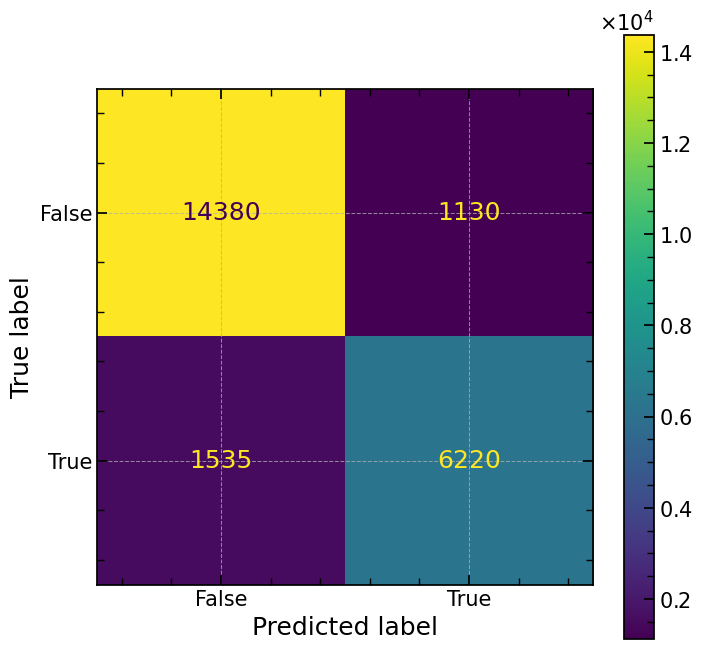

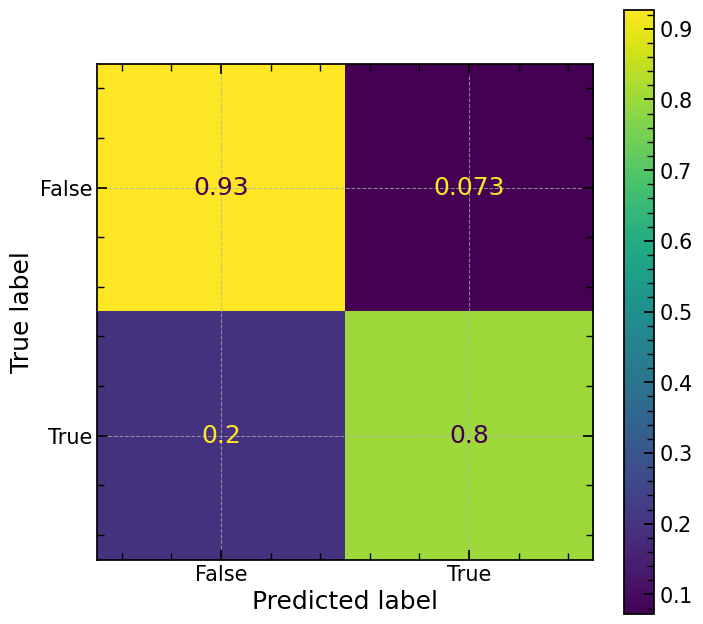

<Figure size 800x400 with 0 Axes>

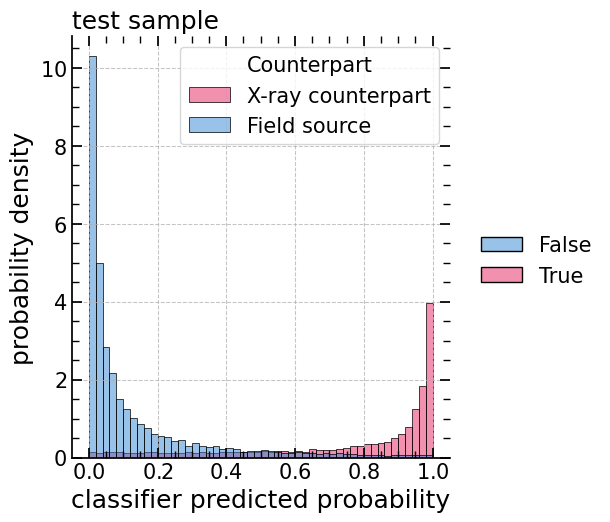

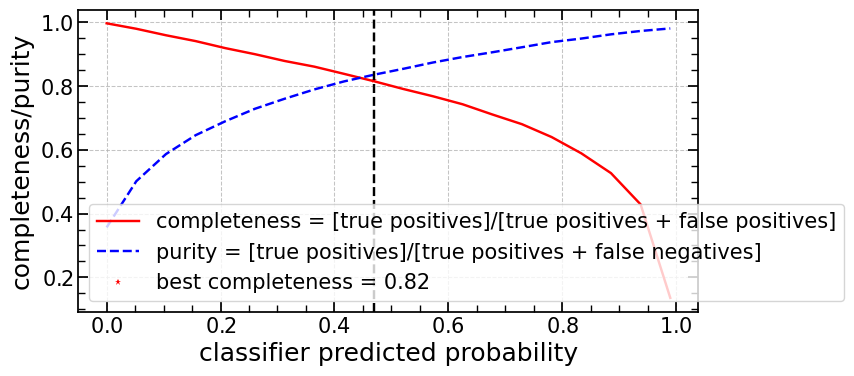

In [13]:
rf, cm, best_completeness, best_purity = train_RF_classifier(data_train_test, features_cols, target_col, x_ray_flux_bin=[3e-15,6e-10],  train_test_fit_split = 0.3, )

In [16]:
rf.fea

AttributeError: 'RandomForestClassifier' object has no attribute 'feature_names_in_'

In [21]:
for col, imp in zip(features_cols, rf.feature_importances_):
    print(col, np.round(imp,2))

mag_g 0.11
mag_r 0.06
mag_z 0.06
mag_w1 0.13
mag_w2 0.29
col_gr 0.11
col_rz 0.07
col_zw1 0.08
col_rw2 0.09


array([0.10897808, 0.05911088, 0.06405892, 0.13488688, 0.29450828,
       0.105883  , 0.06519367, 0.07849062, 0.08888968])

[[47396  3658]
 [ 2216  8863]]


20it [00:24,  1.24s/it]


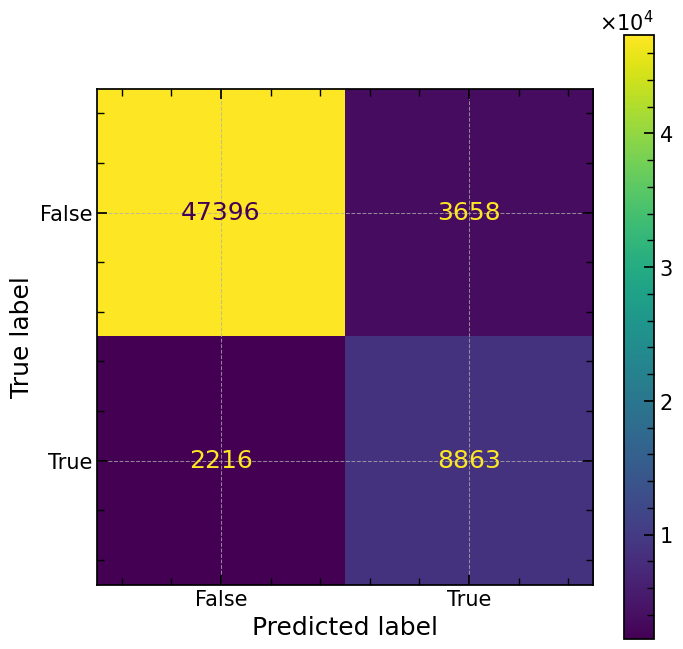

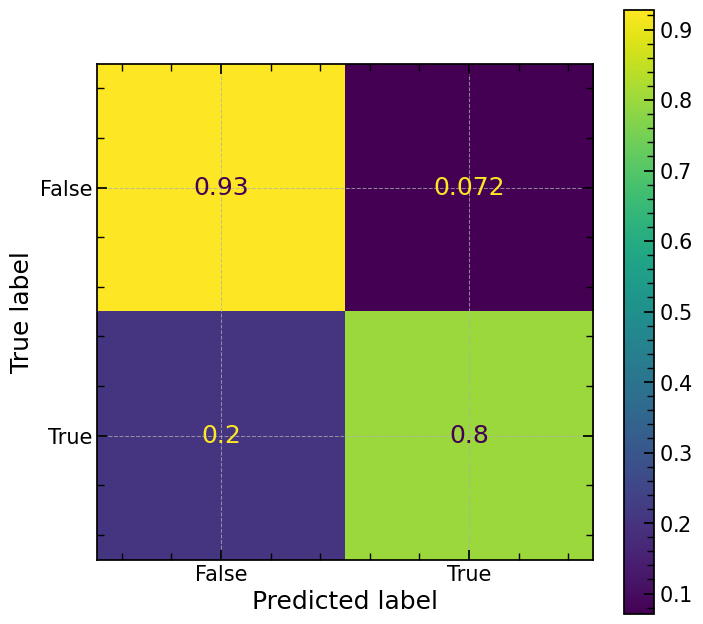

<Figure size 800x400 with 0 Axes>

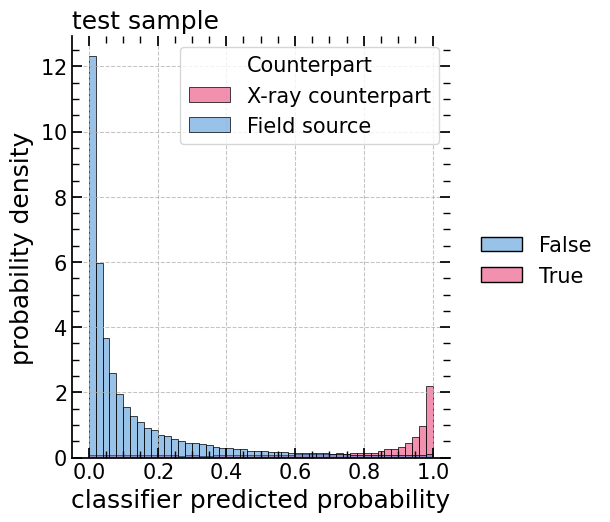

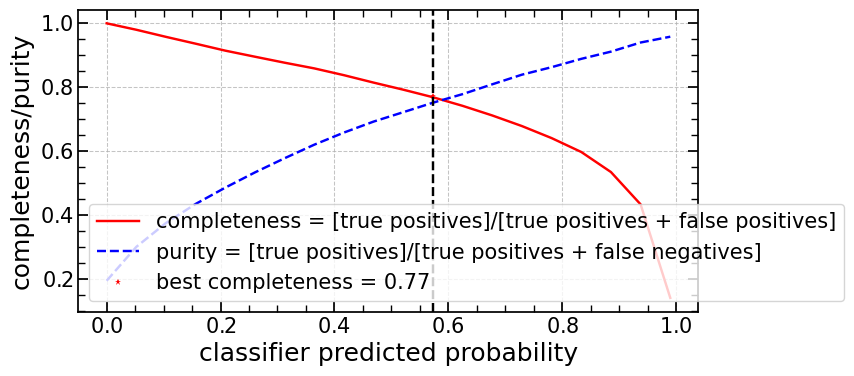

In [14]:
data_val_features = data_validation[features_cols]
data_val_target = data_validation[target_col[0]]
_, _, predict_proba = assess_classifier(rf, data_val_features, data_val_target)

In [28]:
print('eFEDS confusion matrix: (true label norm.)')
print(58041/(58041+738),  738/(58041+738))
print(457/(457+2585), 2582/(457+2585))

eFEDS confusion matrix: (true label norm.)
0.9874444954830807 0.012555504516919308
0.15023011176857332 0.8487836949375411


# Saving classifier  and the  resulting histograms (for NWAY)

In [29]:
print(nn)
from joblib import dump, load
dump(nn, 'model/nn.joblib')

MLPClassifier(alpha=1e-06, early_stopping=True, hidden_layer_sizes=(8, 8),
              max_iter=1000, random_state=111)


['model/nn.joblib']

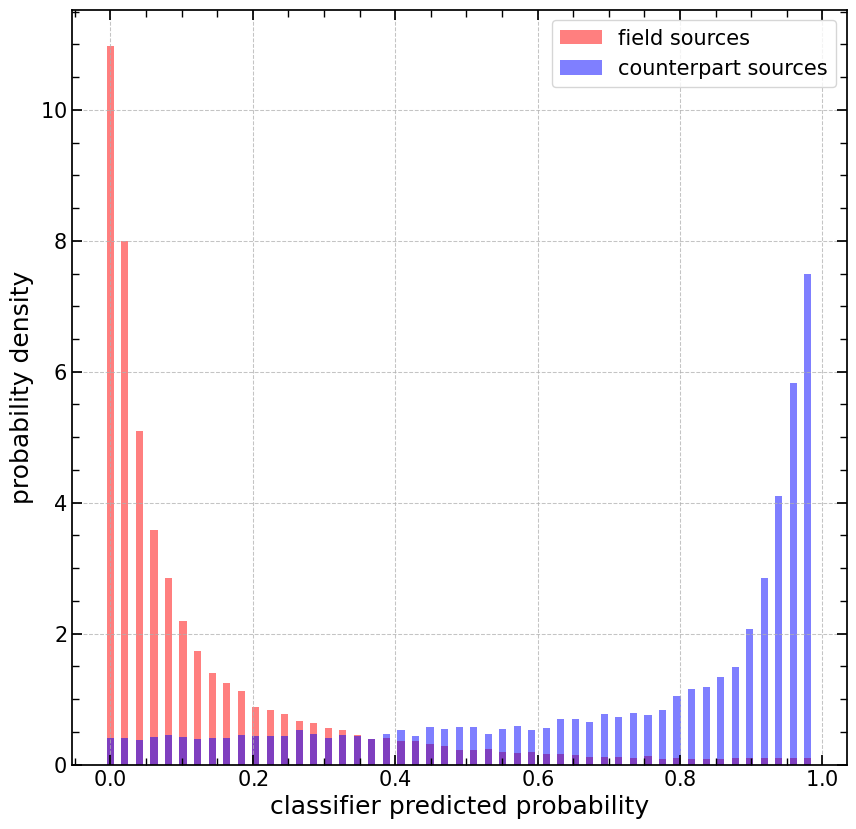

In [30]:
bins = np.linspace(0, 1, 50)
hist_field, bin_field = np.histogram(predict_proba[data_val_target==0], bins=bins, density=True)  
hist_ctsp, bin_ctsp = np.histogram(predict_proba[data_val_target==1], bins=bins, density=True)

plt.figure(figsize=(10,10))
plt.bar(bin_field[:-1], hist_field, width=0.01, color='r', label='field sources', alpha = 0.5)
plt.bar(bin_ctsp[:-1], hist_ctsp, width=0.01, color='b', label='counterpart sources', alpha = 0.5)
plt.legend()
plt.xlabel('classifier predicted probability')
plt.ylabel('probability density')

#save histograms in one file:
#with columns lo, hi, selected, others
hist_df = pd.DataFrame({'lo':bin_field[:-1], 'hi':bin_field[1:], 'selected':hist_ctsp, 'others':hist_field})

hist_df.to_csv('model/nn-prior.csv', index=False, sep = '\t', header = ['#lo', 'hi', 'selected', 'others'])

In [3]:
print(58041+738)
print(457+2585)

58779
3042
